In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('netflix_titles.csv')
data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
44,s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
893,s894,Movie,Bhouri,Jasbir Bijendra Bhati,"Raghuvir Yadav, Masha Paur, Mohan Joshi, Manoj...",India,"December 1, 2017",2017,TV-14,123 min,"Dramas, Independent Movies, International Movies",A 23-year-old girl who's married to a man more...
7349,s7350,Movie,Union Leader,Sanjay Patel,"Rahul Bhat, Tillotama Shome, Haresh Dagiya, Ja...","Canada, India","December 31, 2019",2017,TV-14,105 min,"Dramas, Independent Movies, International Movies",Toxic conditions and a corrupt union leader pr...
4237,s4238,TV Show,Mother Goose Club,NaN,NaN,United States,"May 19, 2017",2016,TV-Y,2 Seasons,Kids' TV,Classic nursery rhymes and children's songs ge...
5822,s5823,TV Show,Stolen Away,NaN,"Daniel Grao, Carolina Lapausa, Melani Olivares...",Spain,"October 23, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...","Searching for his kidnapped daughter, Antonio ..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
shows=data[data['type']=="Tv Show"]
movies=data[data['type']=="Movie"]

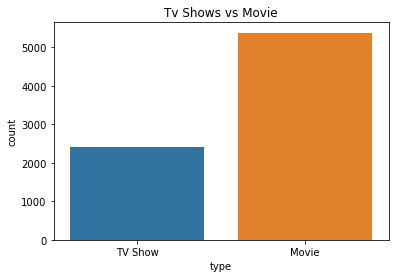

In [15]:
sns.countplot(x="type",data=data)
plt.title('Tv Shows vs Movie');

In [24]:
date =data[['date_added']].dropna()
date['year'] = date['date_added'].apply(lambda x : x.split(', ')[-1])

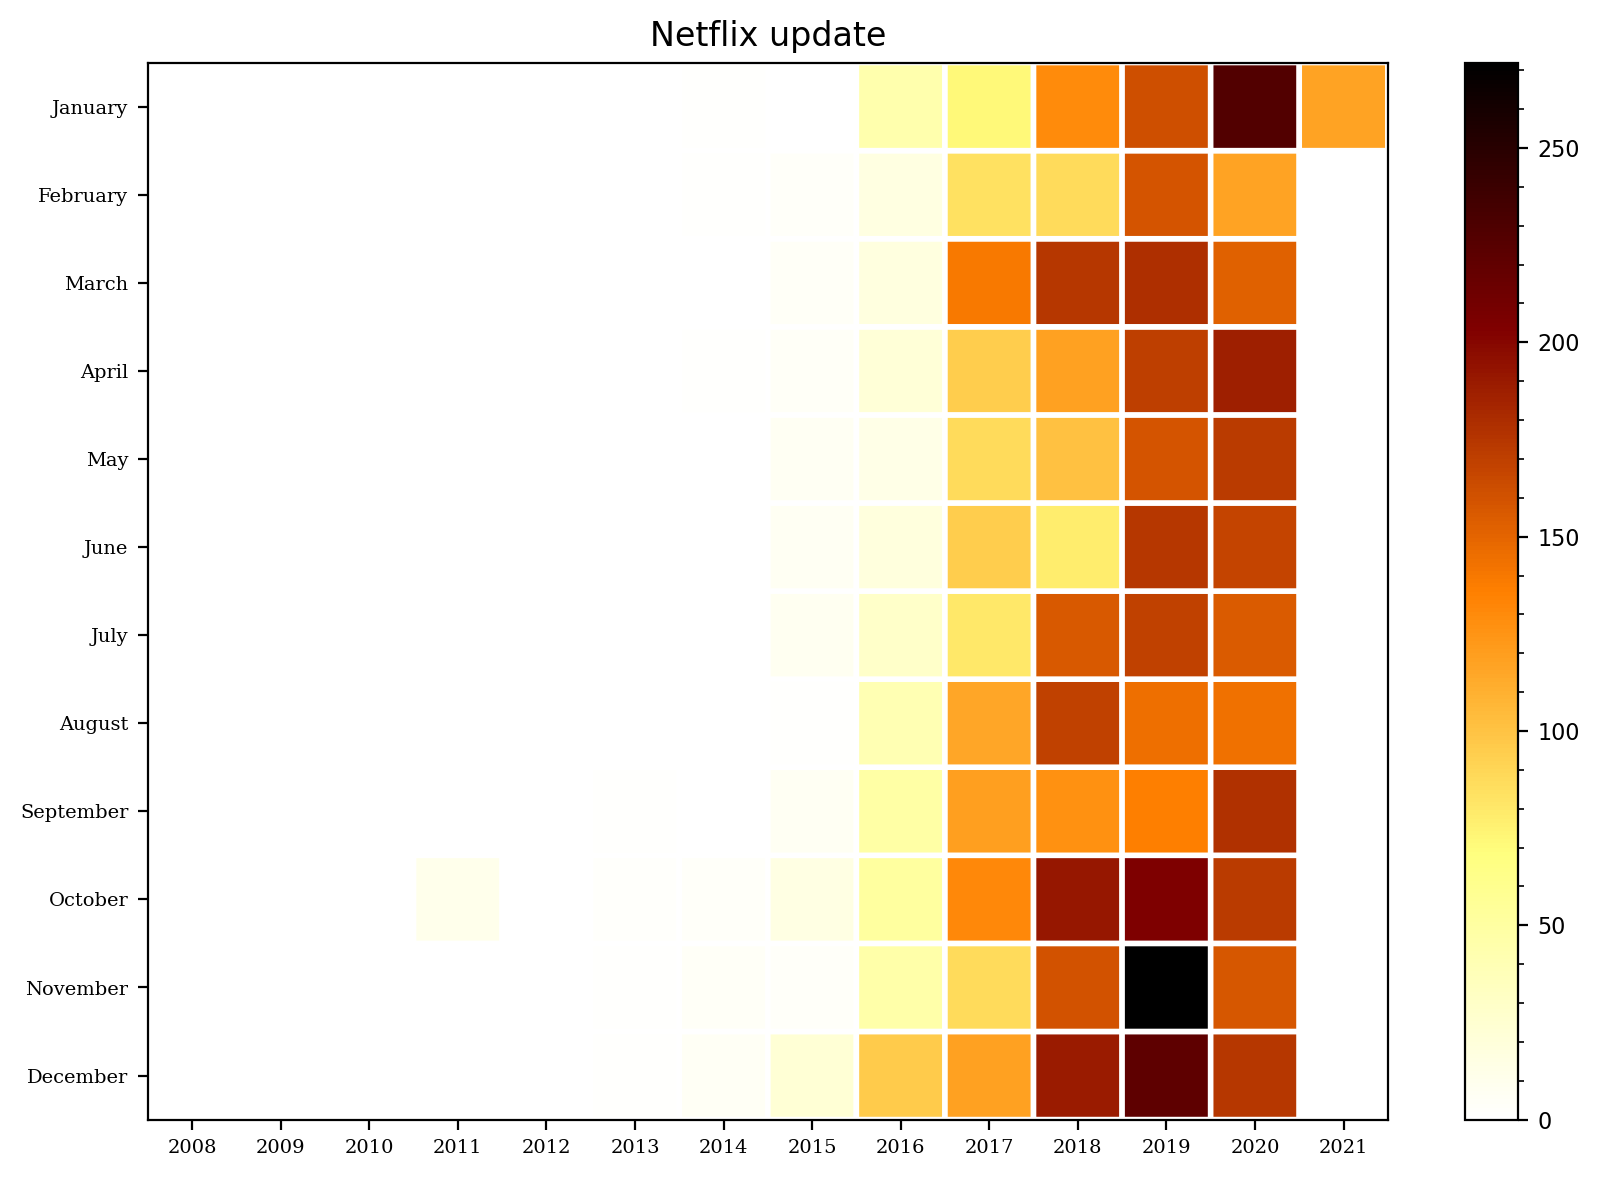

In [28]:
date['month'] = date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = date.groupby('year')['month'].value_counts().unstack().fillna(0)[month].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
plt.title('Netflix update')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

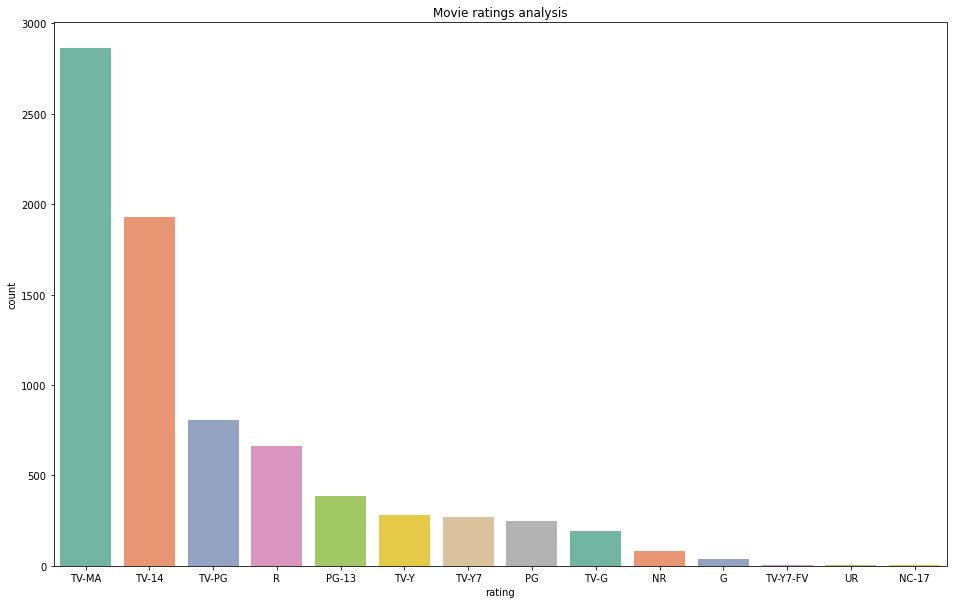

In [32]:
plt.figure(figsize=(16,10))
sns.countplot(x="rating", data=data, palette="Set2", order=data['rating'].value_counts().index[0:15])
plt.title('Movie ratings analysis')
plt.show()

In [13]:
data['country']=data["country"].fillna(data['country'].mode()[0])
data['cast'].replace(np.nan,'No Data',inplace=True)
data['director'].replace(np.nan,'No Data',inplace=True)
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data['date_added']=pd.to_datetime(data["date_added"])
data['month_added']=data["date_added"].dt.month
data['month_name_added']=data["date_added"].dt.month_name()
data['year_added']=data['date_added'].dt.year

In [14]:
data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
4238,s4239,Movie,Motichoor Chaknachoor,Debamitra Biswal,"Nawazuddin Siddiqui, Athiya Shetty, Sanjeev Va...",India,2020-01-20,2019,TV-14,132 min,"Comedies, Dramas, International Movies","Pushing 40 and unemployed, a Dubai returnee de...",1,January,2020
3135,s3136,Movie,Jeff Dunham: Beside Himself,Troy Miller,Jeff Dunham,United States,2019-09-24,2019,TV-MA,58 min,Stand-Up Comedy,Jeff Dunham takes the stage in Dallas with his...,9,September,2019
4486,s4487,Movie,No Estoy Loca,Nicolás López,"Paz Bascuñán, Marcial Tagle, Antonia Zegers, C...",Chile,2018-05-04,2018,TV-MA,116 min,"Comedies, Dramas, International Movies",A woman enters a quirky mental health clinic a...,5,May,2018
1925,s1926,Movie,"Edmilson Filho: Notas, Comedy about Relationships",Halder Gomes,Edmilson Filho,Brazil,2018-11-01,2017,TV-MA,80 min,Stand-Up Comedy,Brazilian comedian Edmilson Filho walks his au...,11,November,2018
4649,s4650,Movie,One More Try,Ruel S. Bayani,"Angel Locsin, Angelica Panganiban, Dingdong Da...",Philippines,2020-11-05,2012,TV-14,102 min,"Dramas, International Movies, Romantic Movies","When her son's condition becomes severe, a wom...",11,November,2020


In [15]:
data['count'] = 1
data['first_country'] = data['country'].apply(lambda x: x.split(",")[0])
data['first_country'].head()
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

data['target_ages'] = data['rating'].replace(ratings_ages)
data['target_ages'].unique()
data['genre'] = data['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
data['first_country'].replace('United States', 'USA', inplace=True)
data['first_country'].replace('United Kingdom', 'UK',inplace=True)
data['first_country'].replace('South Korea', 'S. Korea',inplace=True)

<ipython-input-16-2a9997fab39f>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)


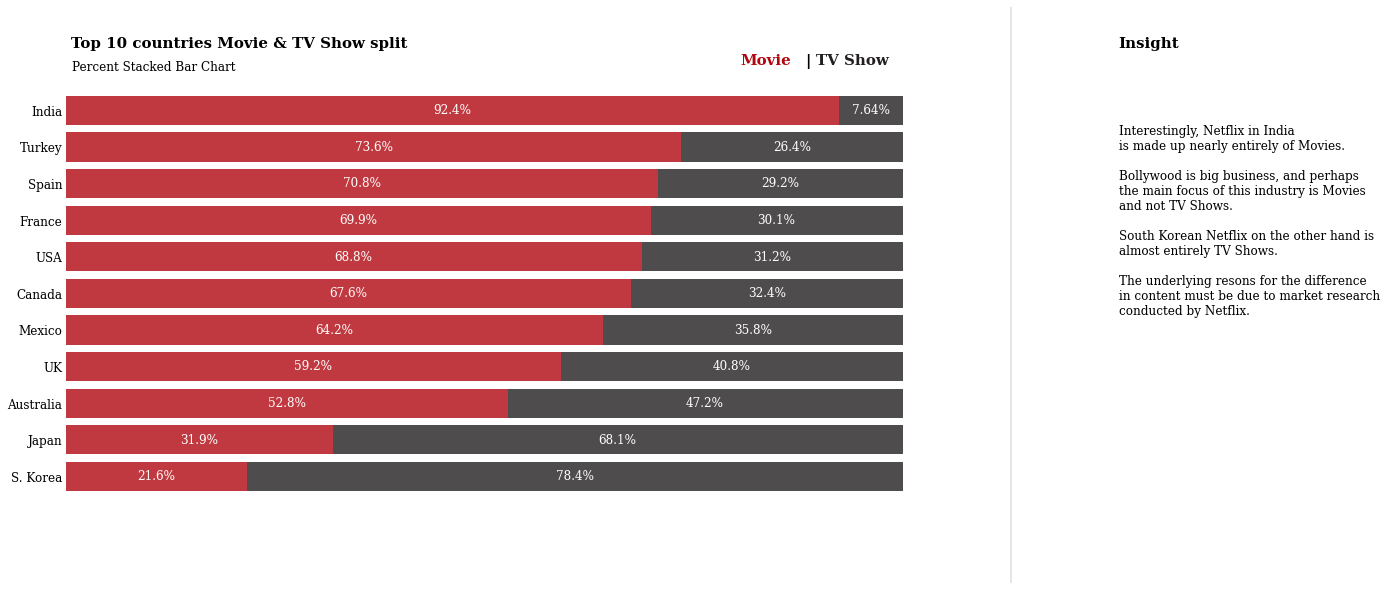

In [16]:
country_order = data['first_country'].value_counts()[:11].index
data_q2q3 = data[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()